# Random Over-Sampling

Random over-sampling consists of extracting samples at random from the minority class. 

<br>This is performed until a certain proportion has been achieved compared to the majority class. 


<br>This is going to adjust the balance ratio to reach 50:50 or 1.

## Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

from imblearn.datasets import fetch_datasets
from imblearn.over_sampling import RandomOverSampler

%matplotlib inline

plt.style.use("dark_background")

---

## Create Data

Two classes would be created utilizing synthetic data: One class with a clear majority of the observations and the other a minority.

In [3]:
# Configuration options
blobs_random_seed = 20
centers = [(0,0), (5,5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate Features and Target
X, y = make_blobs(
    n_samples= num_samples_total,
    centers = centers,
    n_features = num_features_for_samples,
    cluster_std = cluster_std
)

# Transform arrays to pandas dataframe
X = pd.DataFrame(X, columns = ["VarA", "VarB"])
y = pd.Series(y)

# Create imbalanced Feature set
# (The make blobs method creates the same number of 
# observations per class. 
# Thus, we would to downsample manually.)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state = 42)
], axis = 0)

y = y.loc[X.index]

# display dataframe size
X.shape, y.shape

((1000, 2), (1000,))

In [4]:
X.head()

,VarA,VarB
3,-1.404930,1.457498
4,-0.549631,-1.272716
6,-0.838756,-1.195526
8,1.395299,0.854552
13,-1.332914,-0.781794


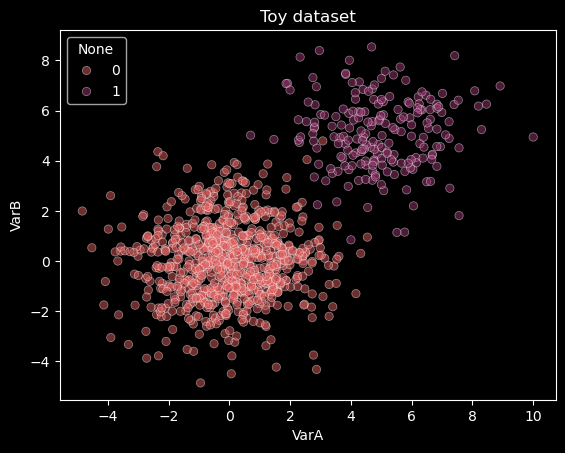

In [5]:
sns.scatterplot(
    data = X,
    x = "VarA",
    y = "VarB",
    hue = y,
    alpha = 0.5,
    palette= "flare"
)

plt.title("Toy dataset");

## Random Over-sampling

Random Over-sampling selects samples from the minority class at random and with replacement, until there are many observations in the dataset as there are in the majority class. 

This can also be set to another balancing ratio.

In [6]:
ros = RandomOverSampler(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
)  

X_res, y_res = ros.fit_resample(X, y)

In [7]:
# size of the over-sampled dataset

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [8]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64)

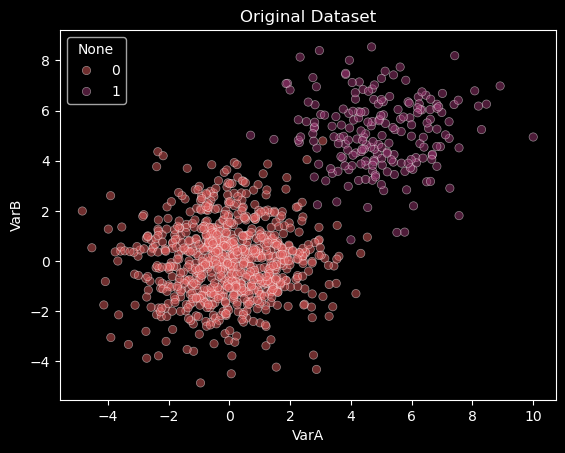

In [9]:
# plot of the original data

sns.scatterplot(
    data = X,
    x = "VarA",
    y = "VarB",
    hue = y,
    alpha = 0.5,
    palette= "flare"
)

plt.title("Original Dataset");

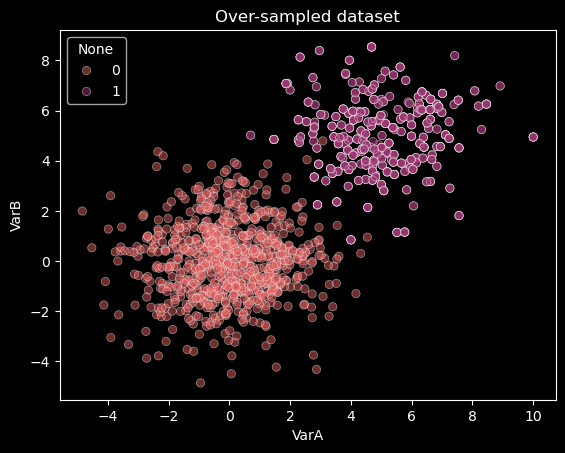

In [10]:
# plot of the resampled 

sns.scatterplot(
    data = X_res,
    x = "VarA",
    y = "VarB",
    hue = y_res,
    alpha = 0.5,
    palette= "flare"
)

plt.title("Over-sampled dataset");

<blockquote>It appears as if there are fewer observations from the minority class. This is because they are identical. 

<br>As a result, the new observations are plotted on top. This is why the minority class observations appear darker and clearer.</blockquote>

---

## Random Over-sampling with smoothing

In order not to DUPLICATE the data, after extracting the samples at random.

<br>The idea is to multiply the value of the sample by a number that take the dispersion of the data into consideration. 

<br>In this way synthetic samples are obtained.

We will try different shrinking parameters to evaluate the effect.

---

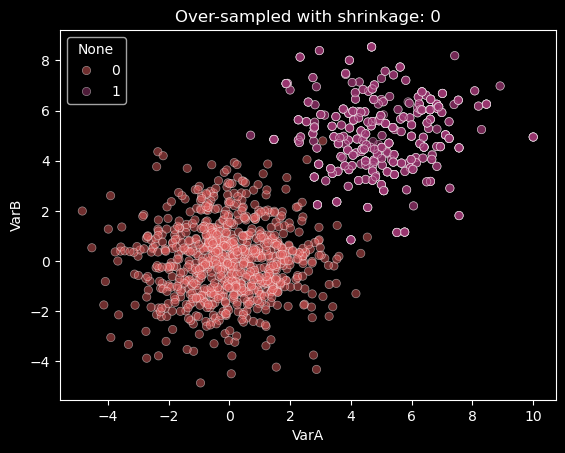

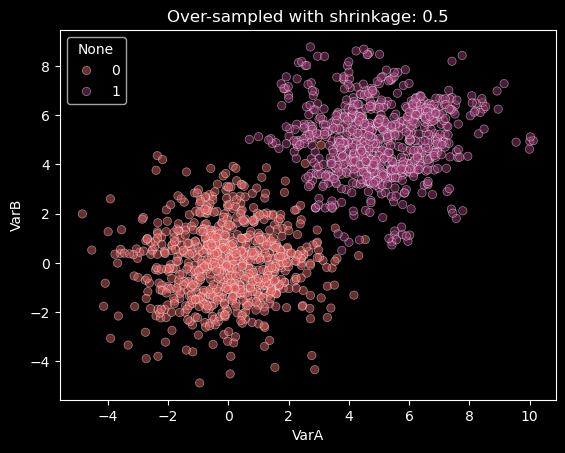

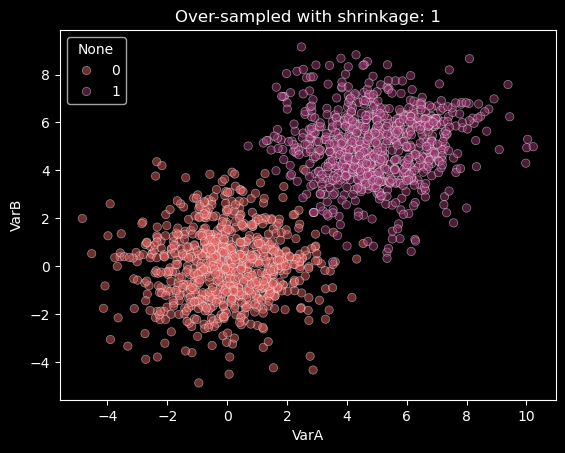

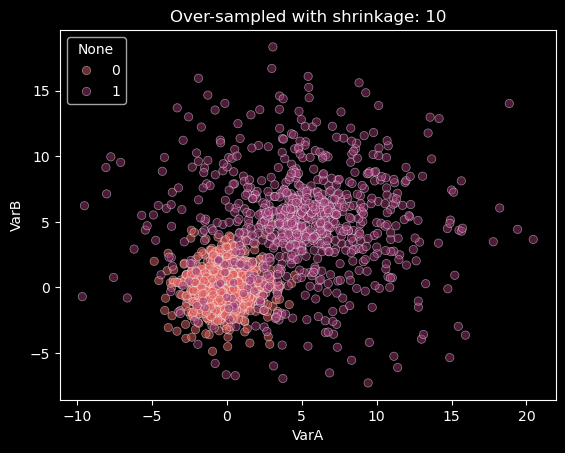

In [11]:
for shrink in [0, 0.5, 1, 10]:
    ros = RandomOverSampler(
        sampling_strategy= "auto",
        random_state = 0,
        shrinkage= shrink
    )
    
    X_resample, y_resample = ros.fit_resample(X, y)
    
    # plot of resampled data
    
    sns.scatterplot(
        data = X_resample,
        x = "VarA",
        y = "VarB",
        hue = y_resample,
        alpha = 0.5,
        palette= "flare"
    )
    
    plt.title(f"Over-sampled with shrinkage: {shrink}")
    plt.show()

<blockquote>The larger the value of the shrinkage, the further away from the center of the distribution the newly created observations would be.<blockquote>

---